This code snippet sets up the environment for a Jupyter Notebook by importing necessary libraries and configuring settings to suppress warnings and enable inline plotting.

1. **Suppressing Warnings**:  
   The `warnings.filterwarnings('ignore')` statement disables all warnings, ensuring that the notebook output remains clean and free of unnecessary warning messages. Additionally, `warnings.filterwarnings('ignore', category=DeprecationWarning)` specifically suppresses deprecation warnings, which occur when features or functions are marked for removal in future versions of a library. This is useful in cases where such warnings are not critical to the current analysis.

2. **Importing Libraries**:  
   - **`gurobipy`**: This library is imported as `gp`, and its `GRB` module is also imported. Gurobi is a powerful optimization solver used for mathematical programming tasks such as linear programming, mixed-integer programming, and more. The `# type: ignore` comments are used to suppress type-checking warnings from tools like `mypy`, which might flag issues due to missing type hints in the library.
   - **`pandas`**: Imported as `pd`, this library is widely used for data manipulation and analysis, particularly for working with tabular data in DataFrames.
   - **`matplotlib.pyplot`**: Imported as `plt`, this module is used for creating visualizations such as line plots, bar charts, and scatter plots.
   - **`IPython.display`**: The `display` function is imported to render rich outputs like styled DataFrames or images directly in the notebook.
   - **`networkx`**: Imported as `nx`, this library is used for creating, analyzing, and visualizing complex networks and graphs.

3. **Enabling Inline Plotting**:  
   The `%matplotlib inline` magic command ensures that all Matplotlib plots are displayed directly within the notebook's output cells as static images. This is particularly useful for interactive data analysis, as it allows users to view plots alongside the code that generates them.

Overall, this setup prepares the notebook for tasks involving optimization modeling, data analysis, and visualization, while ensuring a clean and user-friendly output environment.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import gurobipy          as     gp      # type: ignore
from   gurobipy          import GRB     # type: ignore
import pandas            as     pd      # type: ignore
import matplotlib.pyplot as     plt     # type: ignore
from   IPython.display   import display # type: ignore
import networkx          as     nx      # type: ignore

%matplotlib inline

This code defines the data structures and parameters for a transportation optimization problem, likely involving waste management logistics. The goal is to model the supply, throughput, demand, and transportation costs between various locations to optimize the flow of goods or materials.

The `supply` dictionary specifies the available supply of materials (e.g., waste) at two locations: New York and New Jersey, with capacities of 300,000 and 400,000 units, respectively. These represent the starting points for the transportation network.

The `through` dictionary defines the throughput limits for intermediate depots, such as Bronx, Brooklyn, Queens, and Staten Island. These limits represent the maximum amount of material that can pass through each depot, ensuring that the depots are not overloaded.

The `demand` dictionary outlines the requirements at various landfill sites (C1 through C7). Each landfill has a specific demand, representing the amount of material it needs to receive. Notably, C7 is a new landfill added for a variation of the problem, with a demand of 50,000 units.

The `arcs` and `cost` variables are created using the `gp.multidict` function, which maps transportation routes (arcs) to their associated costs. The arcs represent possible connections between supply points, depots, and landfills, while the costs represent the expense of transporting one unit of material along each route. For example, transporting from New York to Bronx costs 0.7 units, while transporting from Staten Island to C7 costs 2.1 units. New routes and costs have been added for the new landfill (C7) to reflect the variation in the problem.

Overall, this setup provides the necessary data for solving a transportation optimization problem, where the objective might be to minimize transportation costs while meeting all supply, throughput, and demand constraints.

In [2]:
# Supply from cities
supply = {
    'NewYork'      : 300000,
    'NewJersey'    : 400000
}  
# Depot throughput limits
through = {
    'Bronx'        : 140000,
    'Brooklyn'     : 100000,
    'Queens'       : 200000,
    'StatenIsland' :  80000
}
# Landfill demands
demand = {
    'C1'           : 100000,
    'C2'           :  20000,
    'C3'           :  80000,
    'C4'           :  70000,
    'C5'           : 120000,
    'C6'           :  40000,
    'C7'           :  50000   # New landfill for Variation 1
}
# Transportation costs
arcs, cost = gp.multidict({
    ('NewYork'     , 'Bronx')        : 0.7,
    ('NewYork'     , 'Brooklyn')     : 0.7,
    ('NewYork'     , 'Queens')       : 1.2,
    ('NewYork'     , 'StatenIsland') : 0.4,
    ('NewYork'     , 'C1')           : 1.2,
    ('NewYork'     , 'C3')           : 1.7,
    ('NewYork'     , 'C4')           : 2.2,
    ('NewYork'     , 'C6')           : 1.2,
    ('NewYork'     , 'C7')           : 2.0,  # new cost
    ('NewJersey'   , 'Brooklyn')     : 0.5,
    ('NewJersey'   , 'Queens')       : 0.7,
    ('NewJersey'   , 'StatenIsland') : 0.4,
    ('NewJersey'   , 'C1')           : 2.2,
    ('NewJersey'   , 'C7')           : 1.8,  # new cost
    ('Bronx'       , 'C2')           : 1.7,
    ('Bronx'       , 'C3')           : 0.7,
    ('Bronx'       , 'C4')           : 1.7,
    ('Bronx'       , 'C6')           : 1.2,
    ('Bronx'       , 'C7')           : 1.9,  # new cost
    ('Brooklyn'    , 'C1')           : 1.2,
    ('Brooklyn'    , 'C2')           : 0.7,
    ('Brooklyn'    , 'C3')           : 0.7,
    ('Brooklyn'    , 'C4')           : 1.2,
    ('Brooklyn'    , 'C5')           : 0.7,
    ('Brooklyn'    , 'C7')           : 1.5,  # new cost
    ('Queens'      , 'C2')           : 1.7,
    ('Queens'      , 'C3')           : 2.2,
    ('Queens'      , 'C5')           : 0.7,
    ('Queens'      , 'C6')           : 1.7,
    ('Queens'      , 'C7')           : 1.6,  # new cost
    ('StatenIsland', 'C3')           : 0.4,
    ('StatenIsland', 'C4')           : 1.7,
    ('StatenIsland', 'C5')           : 0.7,
    ('StatenIsland', 'C6')           : 1.7,
    ('StatenIsland', 'C7')           : 2.1  # new cost
})

This code defines and solves a transportation optimization model using Gurobi. The model is named "Landfill Transportation" and aims to optimize the flow of materials (e.g., waste) between supply centers, depots, and landfills while adhering to various constraints.

The `flow` variable is created using `addVars`, which defines a set of continuous decision variables for each transportation arc. These variables represent the amount of material transported along each arc. The `obj` parameter assigns transportation costs to these variables, making them part of the objective function to minimize or maximize.

The first set of constraints ensures that the total flow leaving each supply center does not exceed its available supply. This is achieved using `gp.quicksum` to sum the flow variables for all arcs originating from a given center, and comparing it to the corresponding supply value.

The second set of constraints ensures that the total flow entering each landfill matches its demand. Here, `gp.quicksum` is used to sum the flow variables for all arcs ending at a given landfill, and this sum is set equal to the landfill's demand.

The third set of constraints enforces flow conservation at the depots. For each depot, the total incoming flow must equal the total outgoing flow, ensuring that no material is lost or created at the depots.

The fourth set of constraints limits the total flow passing through each depot to its throughput capacity. This ensures that the depots are not overloaded beyond their defined limits.

Finally, the `model.optimize()` function solves the optimization problem, finding the values of the `flow` variables that satisfy all constraints while minimizing or maximizing the objective function. This step produces the optimal transportation plan for the given problem.

In [3]:
model = gp.Model('Landfill Transportation')
flow = model.addVars(
    arcs,
    obj=cost,
    name="flow",
    vtype=GRB.CONTINUOUS
)
centers = supply.keys()
model.addConstrs(
    (
        gp.quicksum(flow.select(center, '*')) <= supply[center] for center in centers
    ),
    name="center"
)
landfills = demand.keys()
model.addConstrs(
    (
        gp.quicksum(flow.select('*', landfill)) == demand[landfill] for landfill in landfills
    ),
    name="landfill"
)
depots = through.keys()
model.addConstrs(
    (
        gp.quicksum(flow.select(depot, '*')) == gp.quicksum(flow.select('*', depot)) for depot in depots
    ),
    name="depot"
)
model.addConstrs(
    (
        gp.quicksum(flow.select('*', depot)) <= through[depot] for depot in depots
    ),
    name="depot_capacity"
)

Restricted license - for non-production use only - expires 2026-11-23


{'Bronx': <gurobi.Constr *Awaiting Model Update*>,
 'Brooklyn': <gurobi.Constr *Awaiting Model Update*>,
 'Queens': <gurobi.Constr *Awaiting Model Update*>,
 'StatenIsland': <gurobi.Constr *Awaiting Model Update*>}

In [4]:
model.params.LogToConsole = 0
print('--------------------------------------------STATUS----------------------------------------------------')
model.optimize()
print(model.status)
if model.status == GRB.OPTIMAL:
    print('--------------------------------------------MODEL NAME------------------------------------------------')
    print(model.ModelName)
    print(model)
    print('--------------------------------------------OBJECTIVE VALUE-------------------------------------------')
    print(model.ObjVal)
    print('--------------------------------------------SOLUTION COUNT--------------------------------------------')
    print(model.SolCount)
    print('--------------------------------------------SOLUTION TIME---------------------------------------------')
    print(f"The Run Time was: {model.Runtime:,.10f}")
    print('------------------------------------------------------------------------------------------------------')
model.write('LandfillTransportation.lp')
model.write('LandfillTransportation.mps')
model.write('LandfillTransportation.sol')

Set parameter LogToConsole to value 0
--------------------------------------------STATUS----------------------------------------------------
2
--------------------------------------------MODEL NAME------------------------------------------------
Landfill Transportation
<gurobi.Model Continuous instance Landfill Transportation: 17 constrs, 35 vars, Parameter changes: LogToConsole=0>
--------------------------------------------OBJECTIVE VALUE-------------------------------------------
631000.0
--------------------------------------------SOLUTION COUNT--------------------------------------------
1
--------------------------------------------SOLUTION TIME---------------------------------------------
The Run Time was: 0.0004909039
------------------------------------------------------------------------------------------------------


This code creates and visualizes a directed graph representing a transportation network using NetworkX and Matplotlib. The graph models the flow of materials (e.g., waste) from supply centers (cities) to intermediate depots and finally to landfills.

The graph is initialized as a directed graph (`DiGraph`) using `nx.DiGraph()`. Three categories of nodes are defined: `cities` (New York and New Jersey), `depots` (Bronx, Brooklyn, Queens, and Staten Island), and `landfills` (C1 through C7). These nodes are added to the graph using the `add_nodes_from` method, which efficiently adds multiple nodes at once.

Edges are then added to represent possible transportation routes. Each city is connected to all depots, and each depot is connected to all landfills. This is achieved using nested loops and the `add_edge` method, which automatically adds an edge between two nodes and ensures the nodes exist in the graph.

The layout for visualizing the graph is defined using a dictionary `pos`. Cities are positioned on the left, depots in the center, and landfills on the right. The positions are calculated using the `enumerate` function to assign unique vertical positions to each node category, ensuring a clear and organized layout.

Finally, the graph is drawn using Matplotlib. The `plt.figure` function sets the figure size, and `nx.draw` renders the graph with specified attributes such as node color, size, and font size. The title "Network Diagram - Variation 1" is added using `plt.title`, and the axes are turned off with `plt.axis('off')` for a cleaner visualization. The `plt.show` function displays the graph. This visualization helps to understand the structure and connectivity of the transportation network.

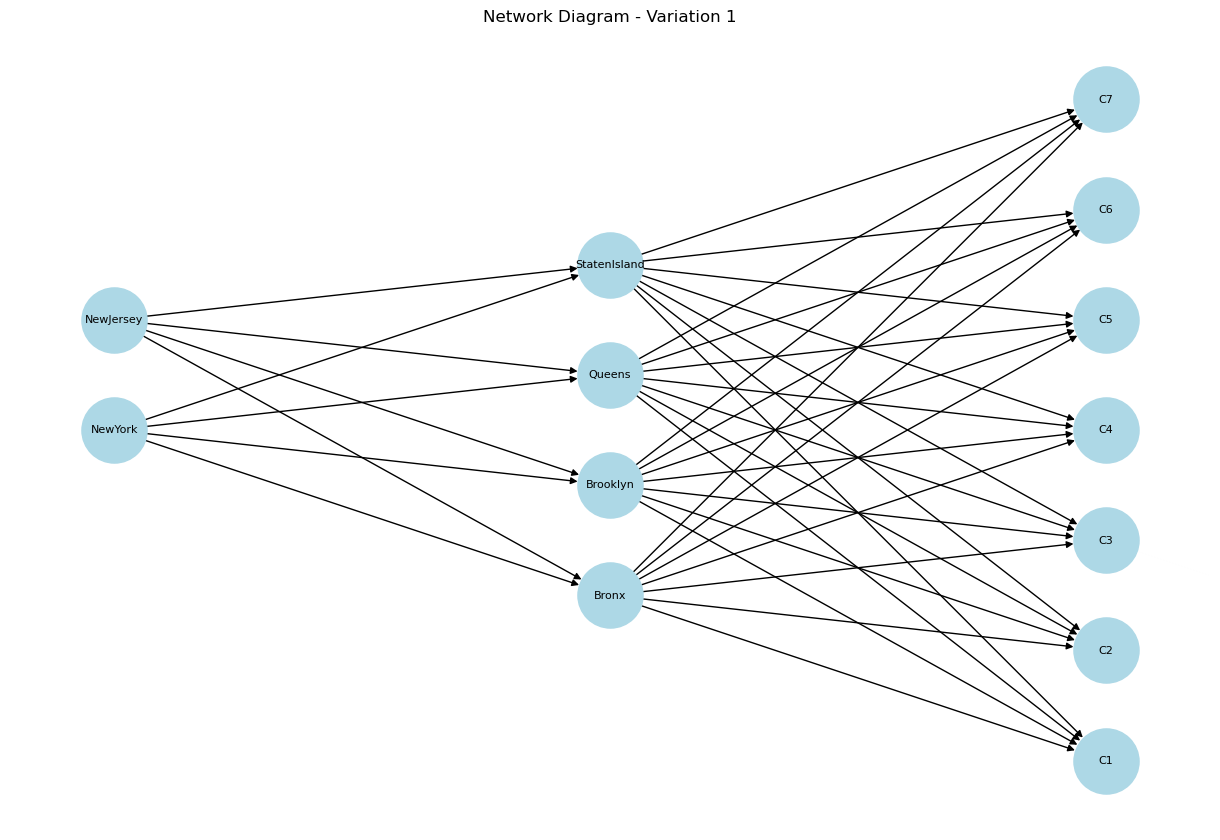

In [5]:
# Create directed graph
G = nx.DiGraph()
# Nodes
cities    = ['NewYork', 'NewJersey']
depots    = ['Bronx', 'Brooklyn', 'Queens', 'StatenIsland']
landfills = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
# Add nodes
G.add_nodes_from(cities)
G.add_nodes_from(depots)
G.add_nodes_from(landfills)
# Add edges
for city in cities:
    for depot in depots:
        G.add_edge(city, depot)
for depot in depots:
    for landfill in landfills:
        G.add_edge(depot, landfill)
# Define layout
pos = {}
# Cities on the left
for i, city in enumerate(cities):
    pos[city] = (-2, i)
# Depots in the center
for i, depot in enumerate(depots):
    pos[depot] = (0, i-1.5)
# Landfills on the right
for i, landfill in enumerate(landfills):
    pos[landfill] = (2, i-3)
# Draw
plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2200, arrowsize=10, font_size=8)
plt.title('Network Diagram - Variation 1')
plt.axis('off')
plt.show()

This code snippet processes the results of an optimization model to create a DataFrame that captures the flow of materials along transportation arcs where the flow is significant. It iterates over all arcs in the network and filters out those with negligible flow values (less than `1e-6`), ensuring that only meaningful flows are included in the final output.

The `product_flow` DataFrame is initialized with three columns: `"From"`, `"To"`, and `"Flow"`. These columns represent the source node, destination node, and the amount of material transported along each arc, respectively. For each arc with a flow value greater than `1e-6`, a new row is created as a small DataFrame containing the source (`arc[0]`), destination (`arc[1]`), and the flow value (`flow[arc].x`). This new row is then appended to the `product_flow` DataFrame using `pd.concat`, with the `ignore_index=True` parameter ensuring that the indices are reset after each concatenation.

Finally, the indices of the `product_flow` DataFrame are replaced with empty strings (`''`) to create a cleaner display format, particularly for presentation purposes. The length of the DataFrame (`len(product_flow)`) determines the number of rows, ensuring that all rows have their indices replaced.

This code is useful for summarizing and visualizing the results of the optimization model, as it provides a clear and concise representation of the significant flows in the transportation network.

In [6]:
product_flow = pd.DataFrame(columns=["From", "To", "Flow"])
for arc in arcs:
    if flow[arc].x > 1e-6:
        new_row = pd.DataFrame({"From": [arc[0]], "To": [arc[1]], "Flow": [flow[arc].x]})
        product_flow = pd.concat([product_flow, new_row], ignore_index=True)  
product_flow.index=[''] * len(product_flow)

This code calculates the total transportation cost and creates a detailed DataFrame summarizing the cost and flow of materials along significant transportation arcs in the network. It iterates over all arcs in the network and processes only those arcs where the flow value (`flow[arc].x`) exceeds a small threshold (`1e-6`), ensuring that only meaningful flows are included.

The variable `totalCost` is initialized to zero and accumulates the total cost of transportation. For each arc with a significant flow, the cost is calculated as the product of the flow value (`flow[arc].x`) and the cost per unit of flow (`cost[arc]`). This value is added to `totalCost` to compute the overall transportation cost.

A new row is created for each significant arc using a small DataFrame. This row contains the source node (`arc[0]`), destination node (`arc[1]`), the cost per unit of flow (`cost[arc]`), the flow value (`flow[arc].x`), and the total cost for that arc (`cost[arc] * flow[arc].x`). The new row is then appended to the `product_cost` DataFrame using `pd.concat`, with the `ignore_index=True` parameter ensuring that the indices are reset after each addition.

Finally, the indices of the `product_cost` DataFrame are replaced with empty strings (`''`) to create a cleaner display format, particularly for presentation purposes. The length of the DataFrame (`len(product_cost)`) determines the number of rows, ensuring that all rows have their indices replaced.

This code is useful for analyzing and visualizing the cost structure of the transportation network. It provides a clear breakdown of the costs and flows for each arc, as well as the total transportation cost, which can be used for reporting or further analysis.

In [7]:
totalCost = 0 
totalFlow = 0
product_cost = pd.DataFrame(columns=["From", "To", "cost", "Flow", "total"])
for arc in arcs:
    if flow[arc].x > 1e-6:
        totalCost = totalCost+ cost[arc] * flow[arc].X
        totalFlow = totalFlow + flow[arc].X
        # Create a new DataFrame for the current row
        new_row = pd.DataFrame({"From": [arc[0]], "To": [arc[1]], "cost": [cost[arc]], "Flow": [flow[arc].x], "total": [cost[arc] * flow[arc].x]})
        # Concatenate the new row with the existing DataFrame
        product_cost = pd.concat([product_cost, new_row], ignore_index=True)  
product_cost.index = [''] * len(product_cost)

This code snippet is used to display the results of the transportation optimization model in a clear and organized manner. It first prints the label `"Flow"` followed by a line of dashes (`"------------------------------------"`) to visually separate the output for better readability.

The `display(product_flow)` function is then used to render the `product_flow` DataFrame, which contains information about the significant flows in the transportation network. This DataFrame typically includes columns such as `"From"`, `"To"`, and `"Flow"`, representing the source node, destination node, and the amount of material transported along each arc, respectively.

Unlike the standard `print` function, which outputs plain text, the `display` function is part of the IPython environment and is designed to render rich representations of objects. For example, it can display DataFrames in a tabular format with proper alignment and styling, making it easier to interpret the data. This is particularly useful in Jupyter Notebooks, where `display` enhances the presentation of results.

In [8]:
print("------------------------------------")
print("Flow")
print("------------------------------------")
display(product_flow)


------------------------------------
Flow
------------------------------------


,From,To,Flow
,NewYork,C1,100000.0
,NewYork,C6,40000.0
,NewJersey,Brooklyn,100000.0
,NewJersey,Queens,110000.0
,NewJersey,StatenIsland,80000.0
,NewJersey,C7,50000.0
,Brooklyn,C2,20000.0
,Brooklyn,C4,70000.0
,Brooklyn,C5,10000.0
,Queens,C5,110000.0


This code visualizes the flow of materials in the transportation network using a bar chart. It provides a clear representation of the flow between source and destination nodes, helping to analyze the results of the optimization model.

The first line creates a new column in the `product_flow` DataFrame called `'From+To'`, which concatenates the source (`'From'`) and destination (`'To'`) columns with an arrow (`' -> '`) in between. This column serves as the x-axis labels for the bar chart, representing each transportation arc.

The `plot` method is then called on the `product_flow` DataFrame to generate a bar chart. The `kind='bar'` argument specifies a bar chart, while `x='From+To'` and `y='Flow'` define the x-axis and y-axis data, respectively. The chart is styled with a figure size of `(10, 6)`, no legend (`legend=False`), and a sky-blue color for the bars (`color='skyblue'`).

The subsequent lines customize the chart's appearance. `plt.title` sets the title of the chart to `'Product Flow by Source'`, while `plt.xlabel` and `plt.ylabel` label the x-axis as `'Source -> Destination'` and the y-axis as `'Flow'`, respectively. The `plt.xticks(rotation=90)` rotates the x-axis labels by 90 degrees to ensure they are readable, especially when there are many labels.

The `plt.tight_layout()` function adjusts the spacing of the chart elements to prevent overlapping, ensuring a clean and organized layout. Finally, `plt.show()` renders the chart, displaying it in the output.

This visualization effectively communicates the flow of materials between nodes, making it easier to interpret the results of the transportation optimization model.

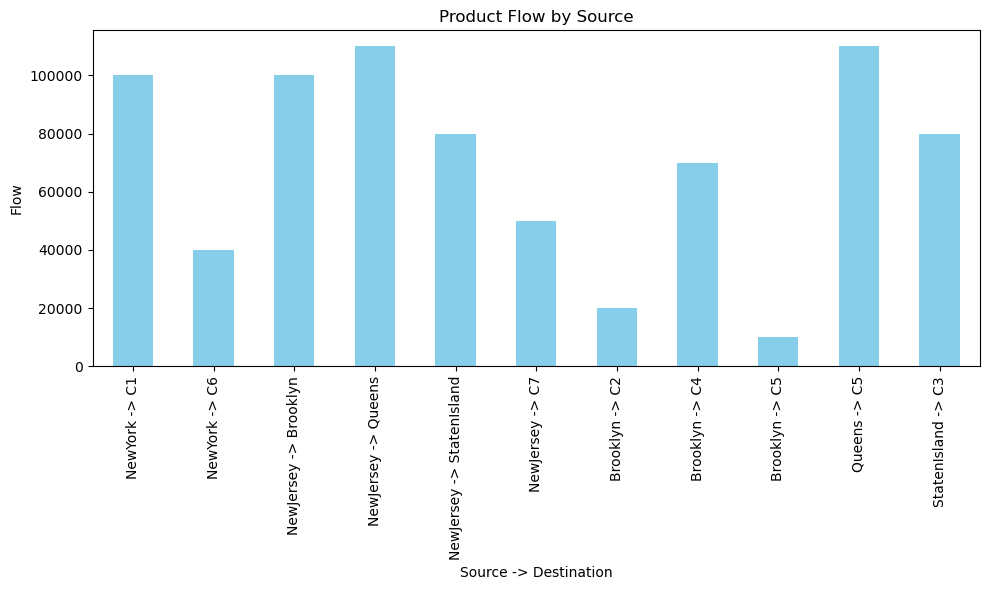

In [9]:
product_flow['From+To'] = product_flow['From'] + ' -> ' + product_flow['To']
product_flow.plot(kind='bar', x='From+To', y='Flow', figsize=(10, 6), legend=False, color='skyblue')
plt.title('Product Flow by Source')
plt.xlabel('Source -> Destination')
plt.ylabel('Flow')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This code snippet is used to display the results of the transportation optimization model, specifically focusing on the costs associated with the transportation network. It begins by printing the label `"Cost"` followed by a line of dashes (`"---------------------------------------------------"`) to visually separate the output for better readability.

The `display(product_cost)` function is then used to render the `product_cost` DataFrame, which contains detailed information about the costs and flows for each significant transportation arc in the network. This DataFrame typically includes columns such as `"From"`, `"To"`, `"cost"`, `"Flow"`, and `"total"`. These columns represent the source node, destination node, cost per unit of flow, the amount of material transported, and the total cost for each arc, respectively.

Unlike the standard `print` function, which outputs plain text, the `display` function is part of the IPython environment and is designed to render rich representations of objects. For example, it can display DataFrames in a tabular format with proper alignment and styling, making it easier to interpret the data. This is particularly useful in Jupyter Notebooks, where `display` enhances the presentation of results by providing a clean and organized view of the data.

In [10]:
print("---------------------------------------------------")
print("Cost")
print("---------------------------------------------------")
display(product_cost)

---------------------------------------------------
Cost
---------------------------------------------------


,From,To,cost,Flow,total
,NewYork,C1,1.2,100000.0,120000.0
,NewYork,C6,1.2,40000.0,48000.0
,NewJersey,Brooklyn,0.5,100000.0,50000.0
,NewJersey,Queens,0.7,110000.0,77000.0
,NewJersey,StatenIsland,0.4,80000.0,32000.0
,NewJersey,C7,1.8,50000.0,90000.0
,Brooklyn,C2,0.7,20000.0,14000.0
,Brooklyn,C4,1.2,70000.0,84000.0
,Brooklyn,C5,0.7,10000.0,7000.0
,Queens,C5,0.7,110000.0,77000.0


This code visualizes the total transportation costs in the network using a bar chart. It provides a clear representation of the costs associated with each transportation arc, helping to analyze the financial aspects of the optimization model.

The first line creates a new column in the `product_cost` DataFrame called `'From+To'`, which concatenates the source (`'From'`) and destination (`'To'`) columns with an arrow (`' -> '`) in between. This column serves as the x-axis labels for the bar chart, representing each transportation arc.

The `plot` method is then called on the `product_cost` DataFrame to generate the bar chart. The `kind='bar'` argument specifies a bar chart, while `x='From+To'` and `y='total'` define the x-axis and y-axis data, respectively. The chart is styled with a figure size of `(10, 6)`, no legend (`legend=False`), and green-colored bars (`color='green'`).

The subsequent lines customize the chart's appearance. `plt.title` sets the title of the chart to `'Total Cost by Source'`, while `plt.xlabel` and `plt.ylabel` label the x-axis as `'Source -> Destination'` and the y-axis as `'Total Cost'`, respectively. The `plt.xticks(rotation=90)` rotates the x-axis labels by 90 degrees to ensure they are readable, especially when there are many labels.

The `plt.tight_layout()` function adjusts the spacing of the chart elements to prevent overlapping, ensuring a clean and organized layout. Finally, `plt.show()` renders the chart, displaying it in the output.

This visualization effectively communicates the cost distribution across transportation arcs, making it easier to interpret and analyze the financial results of the optimization model.

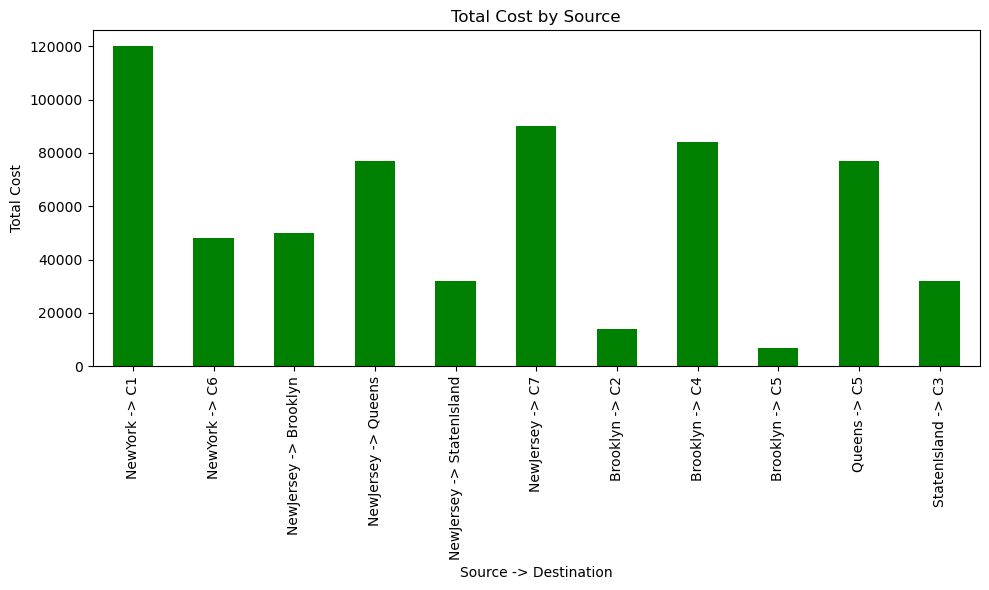

In [11]:
product_cost['From+To'] = product_cost['From'] + ' -> ' + product_cost['To']
product_cost.plot(kind='bar', x='From+To', y='total', figsize=(10, 6), legend=False, color='green')
plt.title('Total Cost by Source')
plt.xlabel('Source -> Destination')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This code snippet uses the `print` function to display the total transportation cost in a formatted and user-friendly manner. The `f-string` (formatted string literal) allows the inclusion of the variable `totalCost` directly within the string, making the output dynamic and easy to read.

The text `"The total Cost is: "` serves as a label to provide context for the displayed value. The variable `totalCost` is formatted using `:,.2f`, which ensures that the number is displayed with two decimal places and includes commas as thousands separators. This formatting improves readability, especially for large numerical values, by adhering to common conventions for financial data.

When executed, this line outputs a message such as `"The total Cost is: 1,234,567.89"`, where `1,234,567.89` is the value of `totalCost`. This output is typically displayed in the console or notebook, making it accessible for review or reporting. It provides a concise summary of the total cost calculated by the optimization model, which is useful for interpreting the results and verifying the model's performance.

In [12]:
print("---------------------------------------------------")
print(f"The total Flow is: {totalFlow:,.2f}")
print(f"The total Cost is: {totalCost:,.2f}")
print("---------------------------------------------------")

---------------------------------------------------
The total Flow is: 770,000.00
The total Cost is: 631,000.00
---------------------------------------------------
